In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("default")
plt.rcParams["figure.figsize"] = (3, 3)

In [91]:
data = pd.read_csv("./res/iris.csv")
len(data)

150

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
data.Species.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

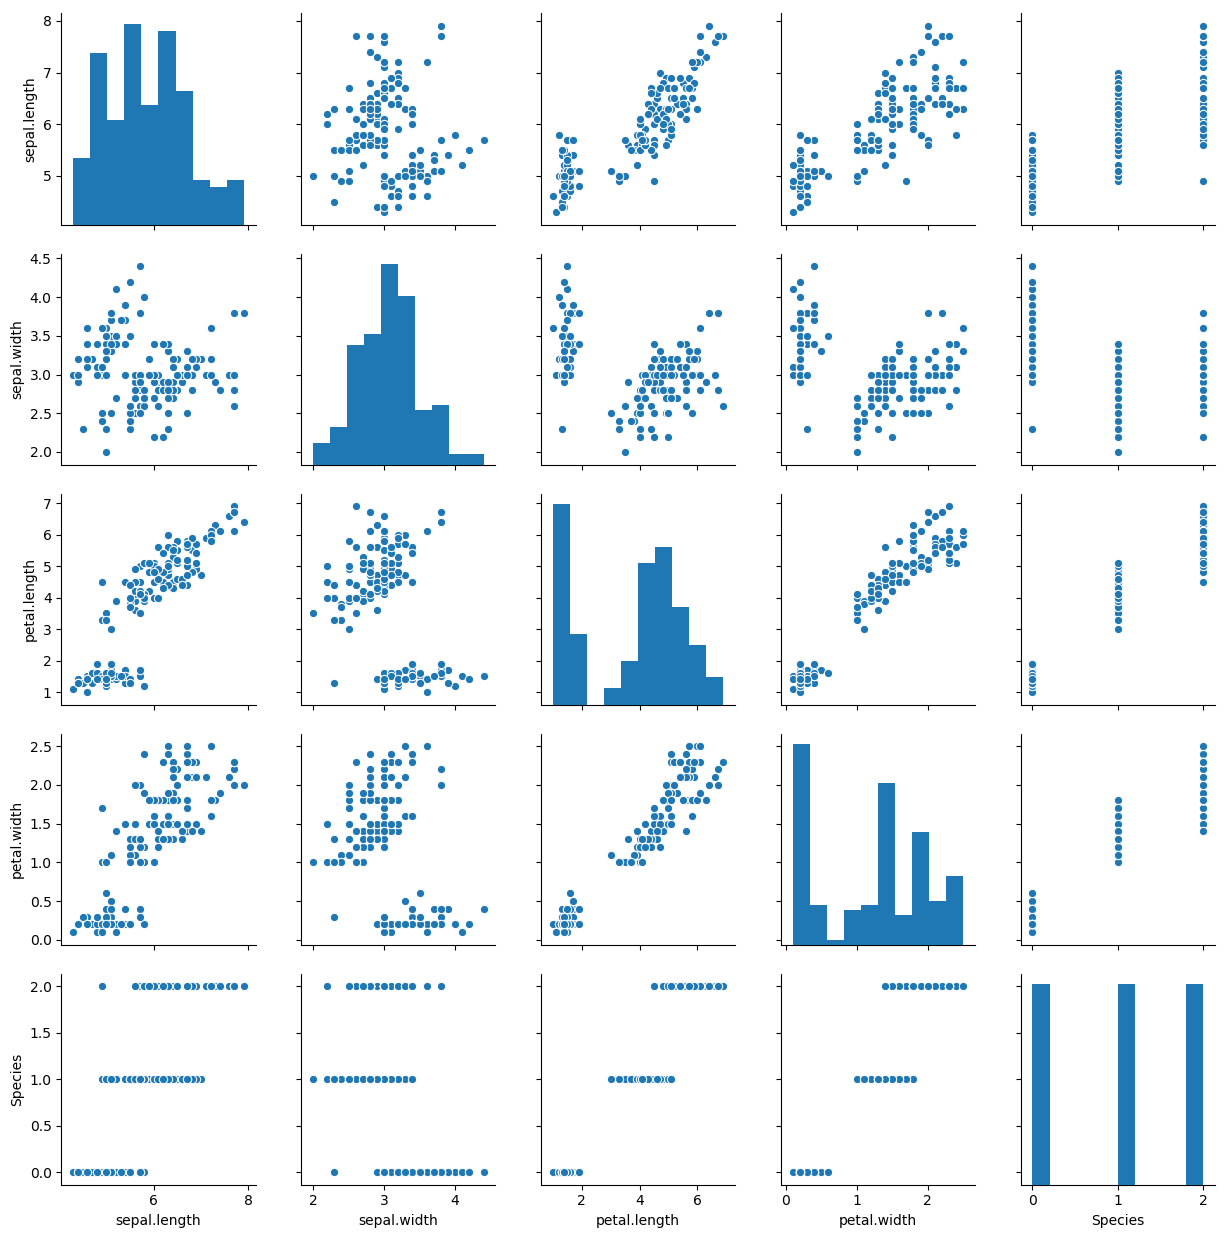

In [55]:
sns.pairplot(data)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


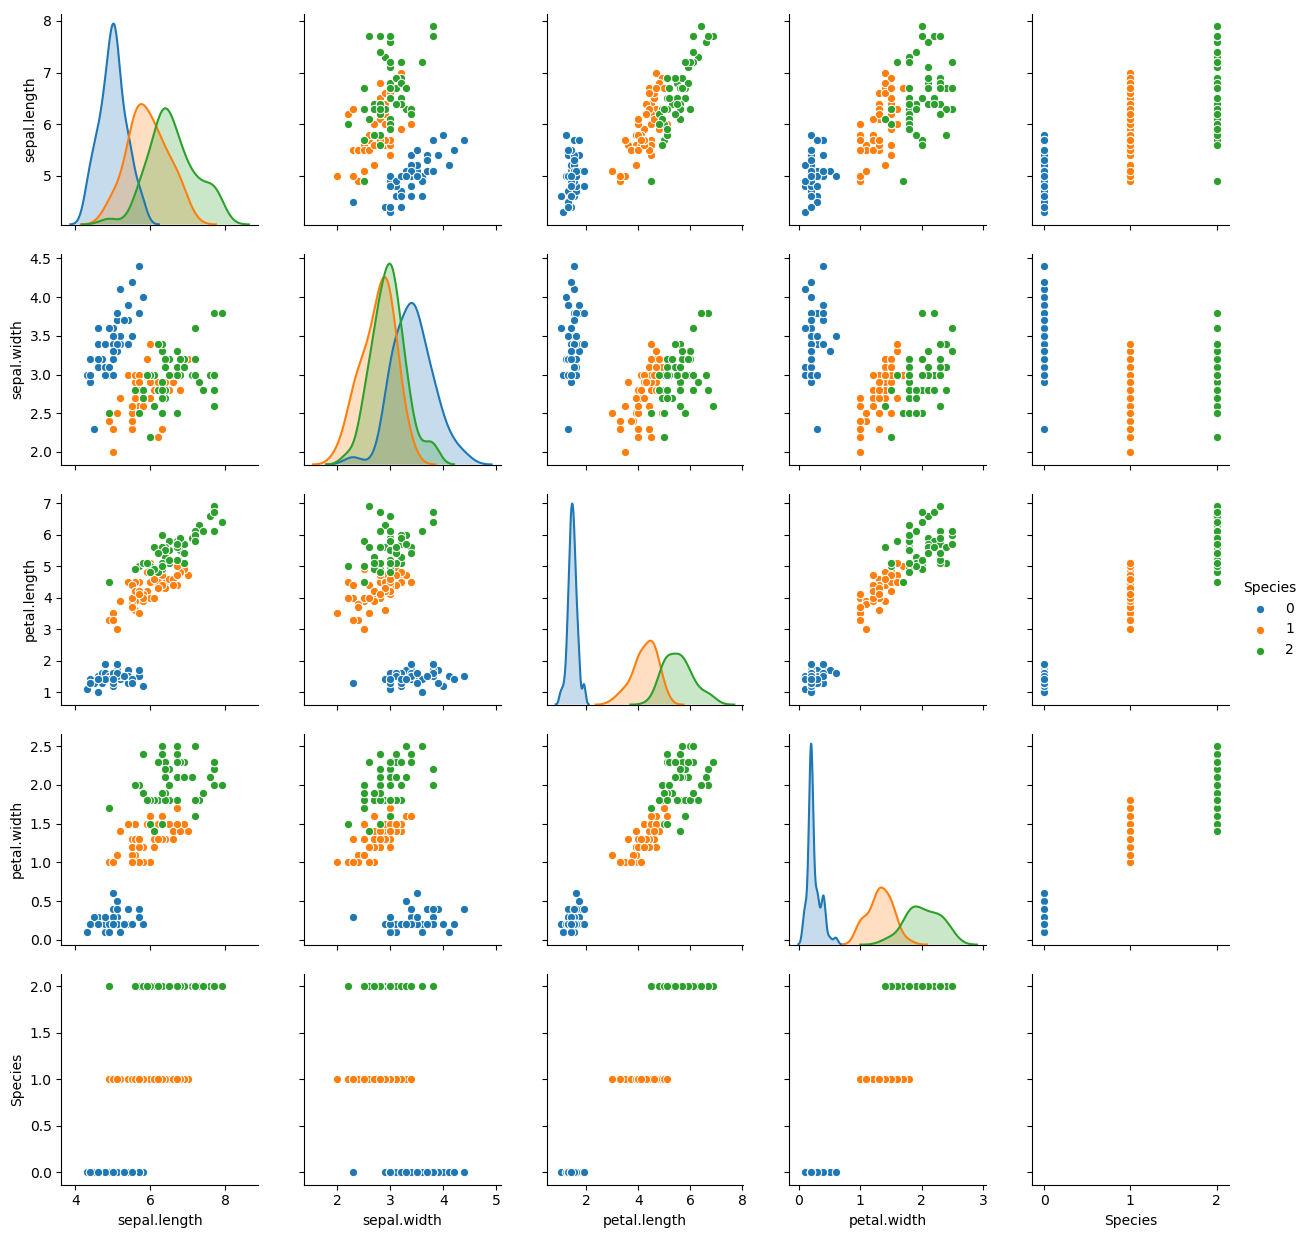

In [56]:
sns.pairplot(data, hue="Species")

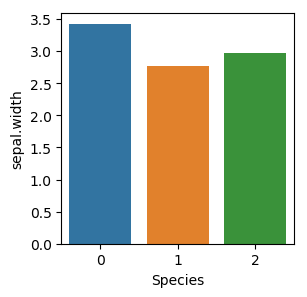

In [64]:
sns.barplot(data["Species"], data["sepal.width"], ci=None)

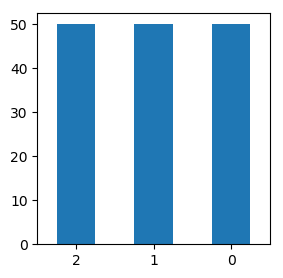

In [65]:
data["Species"].value_counts().plot(kind="bar", rot=0)

In [92]:
data["Species"] = data["Species"].replace(["Setosa", "Versicolor", "Virginica"], [0, 1, 2])

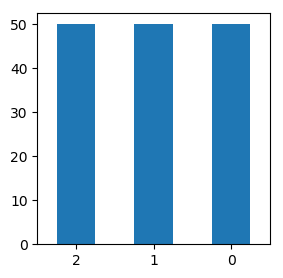

In [93]:
data["Species"].value_counts().plot(kind="bar", rot=0)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [95]:
datax = data[["sepal.length", "sepal.width", "petal.length", "petal.width"]].values
datay = data["Species"].values

In [96]:
print(datax[:5])
print(datay[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
(xtrain, xtest, ytrain, ytest) = train_test_split(datax, datay, train_size=0.8, random_state=1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [99]:
from keras.utils import np_utils

In [100]:
# one-hot encoding
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

## 소프트맥스 회귀

In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [102]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation="softmax"))

In [103]:
sgd = optimizers.SGD(lr=0.01) # 학습률
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(xtrain, ytrain, batch_size=1, epochs=200, validation_data=(xtest, ytest))

Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 3ms/step - loss: 2.6834 - acc: 0.3083 - val_loss: 1.8028 - val_acc: 0.4333
Epoch 2/200
120/120 [==============================] - 0s 831us/step - loss: 1.7831 - acc: 0.3000 - val_loss: 1.3174 - val_acc: 0.4333
Epoch 3/200
120/120 [==============================] - 0s 731us/step - loss: 1.2005 - acc: 0.3833 - val_loss: 1.1114 - val_acc: 0.6000
Epoch 4/200
120/120 [==============================] - 0s 748us/step - loss: 0.9755 - acc: 0.5750 - val_loss: 1.0625 - val_acc: 0.3000
Epoch 5/200
120/120 [==============================] - 0s 698us/step - loss: 0.9022 - acc: 0.4000 - val_loss: 1.0205 - val_acc: 0.2333
Epoch 6/200
120/120 [==============================] - 0s 673us/step - loss: 0.8527 - acc: 0.4500 - val_loss: 0.9701 - val_acc: 0.2667
Epoch 7/200
120/120 [==============================] - 0s 690us/step - loss: 0.8142 - acc: 0.4167 - val_loss: 0.9235 - val_acc: 0.2667
Epoch 8/200


Epoch 61/200
120/120 [==============================] - 0s 723us/step - loss: 0.3164 - acc: 0.9583 - val_loss: 0.3591 - val_acc: 0.9000
Epoch 62/200
120/120 [==============================] - 0s 673us/step - loss: 0.3137 - acc: 0.9583 - val_loss: 0.3526 - val_acc: 0.9000
Epoch 63/200
120/120 [==============================] - 0s 690us/step - loss: 0.3119 - acc: 0.9583 - val_loss: 0.3581 - val_acc: 0.9000
Epoch 64/200
120/120 [==============================] - 0s 665us/step - loss: 0.3076 - acc: 0.9583 - val_loss: 0.3470 - val_acc: 0.9000
Epoch 65/200
120/120 [==============================] - 0s 657us/step - loss: 0.3057 - acc: 0.9667 - val_loss: 0.3436 - val_acc: 0.9000
Epoch 66/200
120/120 [==============================] - 0s 640us/step - loss: 0.3030 - acc: 0.9667 - val_loss: 0.3407 - val_acc: 0.9000
Epoch 67/200
120/120 [==============================] - 0s 673us/step - loss: 0.3014 - acc: 0.9583 - val_loss: 0.3477 - val_acc: 0.9000
Epoch 68/200
120/120 [==========================

120/120 [==============================] - 0s 698us/step - loss: 0.2128 - acc: 0.9583 - val_loss: 0.2593 - val_acc: 0.9333
Epoch 122/200
120/120 [==============================] - 0s 665us/step - loss: 0.2111 - acc: 0.9667 - val_loss: 0.2489 - val_acc: 0.9667
Epoch 123/200
120/120 [==============================] - 0s 648us/step - loss: 0.2107 - acc: 0.9583 - val_loss: 0.2420 - val_acc: 1.0000
Epoch 124/200
120/120 [==============================] - 0s 665us/step - loss: 0.2098 - acc: 0.9667 - val_loss: 0.2520 - val_acc: 0.9667
Epoch 125/200
120/120 [==============================] - 0s 682us/step - loss: 0.2098 - acc: 0.9667 - val_loss: 0.2412 - val_acc: 1.0000
Epoch 126/200
120/120 [==============================] - 0s 698us/step - loss: 0.2083 - acc: 0.9667 - val_loss: 0.2538 - val_acc: 0.9333
Epoch 127/200
120/120 [==============================] - 0s 682us/step - loss: 0.2061 - acc: 0.9667 - val_loss: 0.2401 - val_acc: 1.0000
Epoch 128/200
120/120 [==============================] 

Epoch 181/200
120/120 [==============================] - 0s 690us/step - loss: 0.1634 - acc: 0.9583 - val_loss: 0.1998 - val_acc: 1.0000
Epoch 182/200
120/120 [==============================] - 0s 665us/step - loss: 0.1650 - acc: 0.9583 - val_loss: 0.2017 - val_acc: 1.0000
Epoch 183/200
120/120 [==============================] - 0s 657us/step - loss: 0.1635 - acc: 0.9667 - val_loss: 0.2003 - val_acc: 1.0000
Epoch 184/200
120/120 [==============================] - 0s 673us/step - loss: 0.1617 - acc: 0.9583 - val_loss: 0.1969 - val_acc: 1.0000
Epoch 185/200
120/120 [==============================] - 0s 657us/step - loss: 0.1612 - acc: 0.9583 - val_loss: 0.1965 - val_acc: 1.0000
Epoch 186/200
120/120 [==============================] - 0s 657us/step - loss: 0.1599 - acc: 0.9583 - val_loss: 0.1934 - val_acc: 1.0000
Epoch 187/200
120/120 [==============================] - 0s 698us/step - loss: 0.1592 - acc: 0.9500 - val_loss: 0.1943 - val_acc: 1.0000
Epoch 188/200
120/120 [==================

In [104]:
history.history["acc"]

[0.30833333333333335,
 0.3,
 0.38333333333333336,
 0.575,
 0.4,
 0.45,
 0.4166666666666667,
 0.4166666666666667,
 0.5,
 0.6333333333333333,
 0.8,
 0.7916666666666666,
 0.8166666666666667,
 0.8583333333333333,
 0.8166666666666667,
 0.85,
 0.7833333333333333,
 0.825,
 0.8416666666666667,
 0.875,
 0.9,
 0.8833333333333333,
 0.8833333333333333,
 0.875,
 0.875,
 0.9333333333333333,
 0.8666666666666667,
 0.875,
 0.9166666666666666,
 0.8583333333333333,
 0.925,
 0.9166666666666666,
 0.9333333333333333,
 0.9166666666666666,
 0.9083333333333333,
 0.9416666666666667,
 0.95,
 0.8666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9583333333333334,
 0.9416666666666667,
 0.9333333333333333,
 0.95,
 0.925,
 0.9333333333333333,
 0.9583333333333334,
 0.9416666666666667,
 0.9416666666666667,
 0.95,
 0.95,
 0.95,
 0.9666666666666667,
 0.95,
 0.9583333333333334,
 0.9583333333333334,
 0.9666666666666667,
 0.9416666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9583333333333334,
 0.95833

In [105]:
history.history["loss"]

[2.6833870865404608,
 1.7830974069734415,
 1.2005109955867133,
 0.9755478290220102,
 0.9022401268283526,
 0.8527002353221178,
 0.8142451370755831,
 0.7780534654855729,
 0.7452129521717628,
 0.7135084689905246,
 0.6893050946295262,
 0.6591259616116683,
 0.635343707477053,
 0.613933102414012,
 0.5995067223906517,
 0.5796071536839008,
 0.5645168450971444,
 0.5478145687530438,
 0.5352996777743101,
 0.5257617225249608,
 0.5135584962864717,
 0.5008860004444917,
 0.491288119678696,
 0.4848555641869704,
 0.47173837187389533,
 0.4667769787212213,
 0.45745624688764414,
 0.44966980032622816,
 0.4428219509621461,
 0.4363226276511947,
 0.4302741117154559,
 0.4257111518333356,
 0.4186550553267201,
 0.41385275789846976,
 0.4098664273818334,
 0.4037929786990086,
 0.3991986785704891,
 0.39839349674681823,
 0.3898872619494796,
 0.3863444567968448,
 0.3814976565539837,
 0.3784306194012364,
 0.3734028326657911,
 0.37148346062749626,
 0.3670478109270334,
 0.3616721034049988,
 0.35846185199916364,
 0.355480

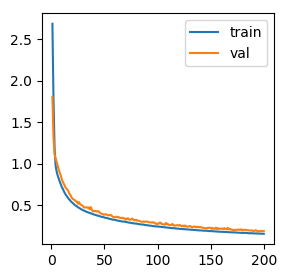

In [106]:
epochs = range(1, len(history.history["acc"])+1)
plt.plot(epochs, history.history["loss"])
plt.plot(epochs, history.history["val_loss"])
plt.legend(["train", "val"], loc="upper right")

In [108]:
print("테스트 정확도: %.4f"%(model.evaluate(xtest, ytest)[1]))

30/30 [==============================] - 0s 32us/step
테스트 정확도: 1.0000


In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [112]:
model = Sequential() # 모델 생성
model.add(Dense(8, input_dim=4, activation="relu", init="uniform")) # init="uniform"): 균등랜덤함수로 난수가 생성됨
# X = (1, 4), W = (4, 8), B (1, 8) → Y = (1, 8)
model.add(Dense(8, activation="relu")) # 히든 레이어 추가 in=8, out=8
# X = (1, 8), W = (8, 8), B (1, 8) → Y = (1, 8)
model.add(Dense(3, activation="softmax")) # 히든 레이어 추가 in=8, out=3
# X = (1, 8), W = (8, 3), B (1, 3) → Y = (1, 3)

# 손실함수
# MSE, CE

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=4, activation="relu", kernel_initializer="uniform")`
  


### 배치 경사하강법
1 epoch에 모든 매개 변수 업데이트를 한 번 수행 <br>
model.fit(xtrain, ytrain, batch_size=len(xtrain)) <br><br>

### 미니 배치
특정 배치 사이즈를 지정. 전체 데이터를 학습하는 것 보다 속도가 빠르다 <br>
model.fit(xtrain, ytrain, batch_size=16) <br><br>

### SGD: 확률적 경사 하강법 
model.fit(xtrain, ytrain, batch_size=1) <br><br>

### momentum
미분을 했을 때 접선의 기울기를 일정량 반영 <br>
로컬 미니멈이 아니라 글로벌 미니멈을 구하는데 도움이 된다 <br>
완전 해결X <br>
keras.optimizers.SGD(lr=0.01, momentum=0.9)  <br><br>

[keras 최적화 참고](https://keras.io/optimizers/)

In [119]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer()
fitText = "The earth is an awesome place live"
# t.fit_on_texts(fitText) # 문자 단위
t.fit_on_texts([fitText]) # 단어 단위
print(t.word_index)

{'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [122]:
test = "The earth is an great place live"
t.texts_to_sequences([test]) #  단어가 없으면 index 생략 - great 생략

[[1, 2, 3, 4, 6, 7]]

In [123]:
t.texts_to_sequences([test])[0]

[1, 2, 3, 4, 6, 7]

### padding
길이를 동일하게 맞춰주는 작업: pad_sequence()

In [127]:
from keras.preprocessing.sequence import pad_sequences
pad_sequences([[10, 20, 30], [40, 50], [60, 70, 80, 90]])

array([[ 0, 10, 20, 30],
       [ 0,  0, 40, 50],
       [60, 70, 80, 90]])

In [128]:
pad_sequences([[10, 20, 30], [40, 50], [60, 70, 80, 90]], maxlen=5)

array([[ 0,  0, 10, 20, 30],
       [ 0,  0,  0, 40, 50],
       [ 0, 60, 70, 80, 90]])

In [126]:
pad_sequences([[10, 20, 30], [40, 50], [60, 70, 80, 90]], maxlen=3)

array([[10, 20, 30],
       [ 0, 40, 50],
       [70, 80, 90]])

In [131]:
pad_sequences([[10, 20, 30], [40, 50], [60, 70, 80, 90]], maxlen=5, padding="pre")

array([[ 0,  0, 10, 20, 30],
       [ 0,  0,  0, 40, 50],
       [ 0, 60, 70, 80, 90]])

In [132]:
pad_sequences([[10, 20, 30], [40, 50], [60, 70, 80, 90]], maxlen=5, padding="post")

array([[10, 20, 30,  0,  0],
       [40, 50,  0,  0,  0],
       [60, 70, 80, 90,  0]])

### 워드 임베딩
단어들을 벡터로 변환 <br>
ont-hot vector은 단어의 수만큼 차원이 생긴다 → 희소 벡터가 될 확률이 높다 <br>
밀집벡터:  실수, 저차원으로 표현하는 방식을 쓴다 <br><br>

Embedding(정수로된 단어) <br>
Embedding(단어집합 크기, 벡터의 크기(차원), 입력 단어 시퀀스 길이)

* Sequntial 층을 구성 → model → model.add() <br>
model = Sequential() <br>
model.add(Embedding(voc, size, length)) <br><br>
* fit() 실제 학습 <br>
model.fit(xtrain, ytrain, epochs=10, batch_size=64, validation_data(xval, yval)) <br><br>
* 테스트 <br>
model.evaluate(xtest, ytest, batch_size=32) <br><br>
* 예측 <br>
model.predict(xinput, batch_size=32) <br><br>
* 모델 저장 <br>
model.save("my_model.h5) <br><br>
* 모델 불러오기
model = load_model("my_model.h5)

# Tensorflow에서 모델 저장

In [136]:
import tensorflow as tf

In [139]:
xdata = [1, 2, 3]
ydata = [1, 2, 3]

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hf = w*x+b
cost = tf.reduce_mean((hf-y)**2)

train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [145]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
feed = {x: xdata, y: ydata}

saver = tf.train.Saver()
for i in range(1001):
    sess.run(train, feed_dict=feed)
    if i%20 == 0:
        print(i, sess.run(cost, feed_dict=feed))
        saver.save(sess, "Model/second", global_step=i)
saver.save(sess, "Model/first")

0 0.19416805
20 0.05203815
40 0.019661417
60 0.0074286065
80 0.0028067268


W0814 13:53:14.241919 42164 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


100 0.0010604598
120 0.0004006722
140 0.00015138423
160 5.7196652e-05
180 2.1610385e-05
200 8.165421e-06
220 3.085168e-06
240 1.1654981e-06
260 4.404385e-07
280 1.6637851e-07
300 6.284596e-08
320 2.374002e-08
340 8.961622e-09
360 3.3793839e-09
380 1.2842882e-09
400 4.831655e-10
420 1.8156736e-10
440 6.9113305e-11
460 2.6441663e-11
480 9.800753e-12
500 3.5290288e-12
520 1.5122718e-12
540 6.9159495e-13
560 2.3803182e-13
580 9.947598e-14
600 4.8553755e-14
620 3.7895614e-14
640 3.7895614e-14
660 3.7895614e-14
680 3.7895614e-14
700 3.7895614e-14
720 3.7895614e-14
740 3.7895614e-14
760 3.7895614e-14
780 3.7895614e-14
800 3.7895614e-14
820 3.7895614e-14
840 3.7895614e-14
860 3.7895614e-14
880 3.7895614e-14
900 3.7895614e-14
920 3.7895614e-14
940 3.7895614e-14
960 3.7895614e-14
980 3.7895614e-14
1000 3.7895614e-14


'Model/first'

In [148]:
xdata = [1, 2, 3]
ydata = [1, 2, 3]

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hf = w*x+b
cost = tf.reduce_mean((hf-y)**2)

train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

sess = tf.Session()
saver = tf.train.Saver()
latest = tf.train.latest_checkpoint("Model") # Model 폴더의 가장 최신 model 불러오기
print(latest)
saver.restore(sess, latest)
print(sess.run(hf, feed_dict={x: [5, 7]}))

Model\first


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable_3 not found in checkpoint
	 [[node save_8/RestoreV2 (defined at <ipython-input-148-3a91847bb8b6>:16) ]]

Original stack trace for 'save_8/RestoreV2':
  File "C:\Users\user\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\user\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\user\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\user\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\user\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\user\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-148-3a91847bb8b6>", line 16, in <module>
    saver = tf.train.Saver()
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 825, in __init__
    self.build()
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 837, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 875, in _build
    build_restore=build_restore)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 508, in _build_internal
    restore_sequentially, reshape)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 328, in _AddRestoreOps
    restore_sequentially)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 575, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1779, in restore_v2
    name=name)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


# 함수형 API 신경망 구성

In [152]:
from keras.layers import Input, Dense
from keras.models import Model

In [155]:
inputs = Input(shape=(10, )) # 입력 10개
h1 = Dense(64, activation="relu")(inputs)
h2 = Dense(64, activation="relu")(h1)
output = Dense(1, activation="sigmoid")(h2)

model = Model(inputs=inputs, outputs=output)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
